# Análise exploratória das variáveis numéricas

In [1]:
#Libs
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Carregando datasets
df_train = pd.read_csv('../input/train.csv')
train_sample = pd.read_csv('../output/train_sample.csv')
train_sample_y = train_sample.TARGET

Ao final das observações realizadas no arquivo anterior, selecionamos as seguintes variáveis para análise:

* Variáveis contínuas:
    - saldo_var5
    - saldo_var30
    - saldo_var42
    - saldo_medio_var5_hace2
    - saldo_medio_var5_ult1
    - saldo_medio_var5_ult3
    - var38
    
    
* Possíveis variáveis categóricas codificadas:
    - num_var4
    - num_var5_0
    - num_var5
    - num_var30_0
    - num_var30
    - num_var35
    - num_var39_0
    - num_var41_0
    - num_var42_0
    - num_var42
    - var_36
    - num_meses_var5_ult3
    - num_meses_var39_vig_ult3
    
    
* Variáveis não classificadas:
    - var3
    - var15
    
Neste arquivo faremos uma análise de cada variável, buscando identificar inconsistências e correlações.

In [3]:
continous_vars = ['saldo_var5','saldo_var30','saldo_var42','saldo_medio_var5_hace2','saldo_medio_var5_ult1','saldo_medio_var5_ult3','var38']
num_cat_vars = ['num_var4','num_var5','num_var5_0','num_var30','num_var30_0','num_var35','num_var39_0','num_var41_0','num_var42_0','num_var42','var36','num_meses_var5_ult3','num_meses_var39_vig_ult3']
unkown_vars = ['var3', 'var15']

## Variáveis contínuas

In [4]:
df_continous_vars = train_sample.loc[:,continous_vars]

In [5]:
df_continous_vars.describe().T

,count,mean,std,min,25%,50%,75%,max
saldo_var5,6016.0,644.244445,6024.525600,-2895.72,0.00,1.500,20.730000,179160.00
saldo_var30,6016.0,7042.781983,39073.849171,-2895.72,0.00,3.000,90.000000,668885.04
saldo_var42,6016.0,3640.893216,28163.052116,-2895.72,0.00,3.000,60.000000,668885.04
saldo_medio_var5_hace2,6016.0,871.048070,7248.239391,-47.13,0.00,3.000,39.832500,217818.78
saldo_medio_var5_ult1,6016.0,600.117417,4888.195432,-733.05,0.00,3.000,30.000000,150006.00
saldo_medio_var5_ult3,6016.0,597.796875,4732.276362,-173.64,0.00,2.070,42.660000,123000.00
var38,6016.0,110188.364899,176270.893475,11136.63,61953.18,95826.735,117310.979016,9792857.49


Essas variáveis aparentam estar relacionadas ao saldo bancário dos clientes observados sob diferentes perspectivas.

A variável 'var38' não possui valores negativos e agrupa um range de valores elevados. Uma possível hipótese é que esta variável representa o maior saldo disponível do cliente.

Adicionaremos a variável TARGET para buscar correlações entre essas variáveis e o grau de satisfação dos clientes:

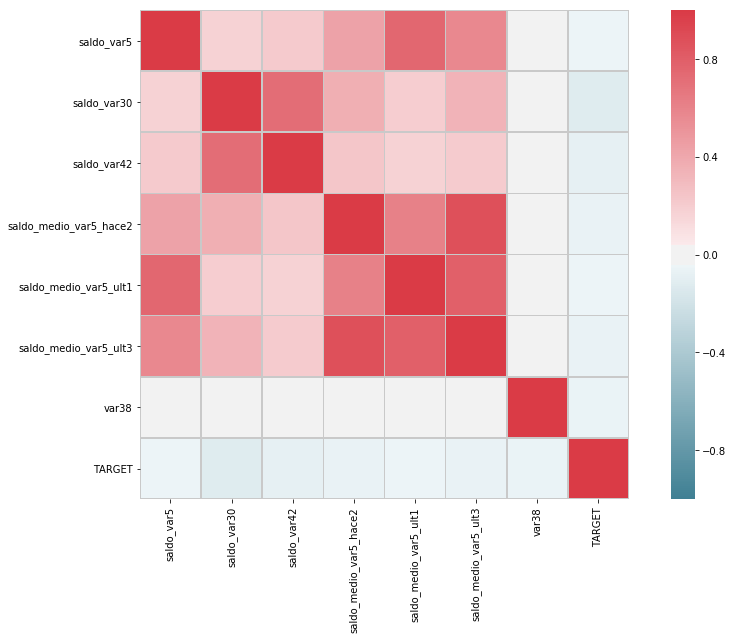

In [33]:
# Colocamos a variável TARGET neste conjunto, calculamos a correlação
continous_vars_corr = df_continous_vars.join(train_sample_y).corr()

# E plotamos um heatmap para auxiliar a compreensão dos dados
fig, axis = plt.subplots(figsize=(15,9))
corr_cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(continous_vars_corr, cmap=corr_cmap,
            linewidths=.5, linecolor='#c9c9c9', vmin=-1, vmax=1,
            square=True, xticklabels=True, yticklabels=True)

Nenhuma destas variáveis contínuas apresentou significância em determinar a satisfação do cliente.

## Variáveis categóricas

In [6]:
df_cat_vars = train_sample.loc[:,num_cat_vars]

In [7]:
df_cat_vars.describe().T

,count,mean,std,min,25%,50%,75%,max
num_var4,6016.0,0.902261,0.981333,0.0,0.0,1.0,1.0,6.0
num_var5,6016.0,1.554355,1.514037,0.0,0.0,3.0,3.0,6.0
num_var5_0,6016.0,2.849402,0.752889,0.0,3.0,3.0,3.0,6.0
num_var30,6016.0,1.840093,1.702288,0.0,0.0,3.0,3.0,12.0
num_var30_0,6016.0,3.240858,1.729121,0.0,3.0,3.0,3.0,114.0
num_var35,6016.0,2.762633,3.075688,0.0,0.0,3.0,3.0,27.0
num_var39_0,6016.0,2.636968,1.220709,0.0,3.0,3.0,3.0,12.0
num_var41_0,6016.0,2.613531,1.182897,0.0,3.0,3.0,3.0,12.0
num_var42_0,6016.0,3.148105,1.585629,0.0,3.0,3.0,3.0,114.0
num_var42,6016.0,1.737866,1.581776,0.0,0.0,3.0,3.0,12.0


In [8]:
#Observando as ocorrências dessas variáveis
for col in df_cat_vars.columns:
    print(df_cat_vars[col].value_counts())

num_var4
0    2474
1    2250
2     826
3     359
4      88
5      17
6       2
Name: num_var4, dtype: int64
num_var5
0    2914
3    3087
6      15
Name: num_var5, dtype: int64
num_var5_0
0     348
3    5622
6      46
Name: num_var5_0, dtype: int64
num_var30
0     2552
3     3262
6      183
9       14
12       5
Name: num_var30, dtype: int64
num_var30_0
0        15
3      5628
6       290
9        75
12        7
114       1
Name: num_var30_0, dtype: int64
num_var35
0     2474
3     2238
6      792
9      376
12     103
15      26
18       3
21       3
27       1
Name: num_var35, dtype: int64
num_var39_0
0      893
3     4970
6      142
9       10
12       1
Name: num_var39_0, dtype: int64
num_var41_0
0      897
3     5004
6      109
9        5
12       1
Name: num_var41_0, dtype: int64
num_var42_0
0        21
3      5724
6       260
9         9
12        1
114       1
Name: num_var42_0, dtype: int64
num_var42
0     2630
3     3290
6       94
9        1
12       1
Name: num_var42, dtype:

* A variável *num_var42* possui um range de 0 a 99, podendo indicar que esta seja uma variável contínua cujo cálculo deve variar entre 0 e 100. Mais da metade dos registros foram classificados como 99;
* As variáveis *num_meses_var5* e *num_meses_var39* possuem um range entre 0 e 3.
* As demais variáveis foram atribuídas com valores múltiplos de 3, sugerindo periodicidade trimestral.

Nos três casos observados, será necessário analisar a correlação com a variável TARGET, para determinar se os valores atribuídos possuem significado real.

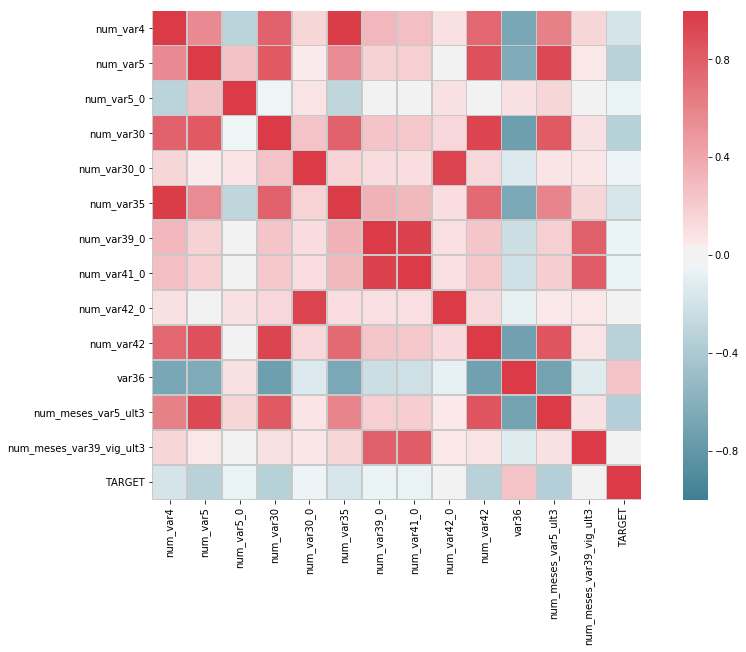

In [20]:
# Colocamos a variável TARGET neste conjunto, calculamos a correlação
cat_vars_corr = df_cat_vars.join(train_sample_y).corr()

# E plotamos um heatmap para auxiliar a compreensão dos dados
fig, axis = plt.subplots(figsize=(15,9))
corr_cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cat_vars_corr, cmap=corr_cmap,
            linewidths=.5, linecolor='#c9c9c9', vmin=-1, vmax=1,
            square=True, xticklabels=True, yticklabels=True)

As variáveis 'num_var5', 'num_var30', 'num_var42' e 'num_meses_var5_ult3' possuem variação positiva entre sí e variação negativa na variável TARGET, sugerindo que são boas alternativas para classificarmos clientes satisfeitos.

Destas opções, a variável 'var36' melhor representou a classificação de clientes insatisfeitos, sugerindo que quando maior o número observado, maior será a probabilidade classificar este cliente como insatisfeito.

Contudo, percebemos durante a análise de valores distintos que esta variável possui um range de valores entre 0 e 99:

In [32]:
train_sample.groupby('TARGET')['var36'].value_counts()

TARGET  var36
0       99       1170
        3         924
        1         570
        2         329
        0          15
1       99       1938
        1         461
        3         368
        2         241
Name: var36, dtype: int64

A ausência de outros valores sugere que os números 0, 1, 2, 3 e 99 referem-se a IDs. Contudo, quando observamos essa variável entre clientes insatisfeitos, pecebemos uma presença maior do valor 99.

## Variáveis desconhecidas

In [10]:
df_unknown_vars = train_sample.loc[:,unkown_vars]

In [11]:
df_unknown_vars.describe().T

,count,mean,std,min,25%,50%,75%,max
var3,6016.0,-1825.955286,42724.971207,-999999.0,2.0,2.0,2.0,225.0
var15,6016.0,36.186503,12.836971,9.0,25.0,33.0,44.0,102.0


### Var3

Percebemos que pelo menos 50% dos registros estão preenchidos com o número 2 entre os percentis 25 e 75. Podemos perceber um valor extremo -999999, desbalanceando a média e o desvio padrão dessa variável.

Conforme observado no arquivo anterior, também sabemos que existem 41 resultados distintos nessa variável. Precisamos observar estes valores para verificar se essa é uma variável categórica ou contínua:

In [38]:
df_unknown_vars.var3.value_counts()

 2         5878
 1           15
-999999      11
 8           10
 12           9
 0            7
 4            7
 9            6
 10           6
 14           6
 7            6
 6            6
 3            5
 5            5
 11           5
 13           4
 15           3
 129          2
 116          2
 49           2
 152          1
 53           1
 60           1
 52           1
 28           1
 147          1
 69           1
 121          1
 169          1
 201          1
 111          1
 30           1
 86           1
 114          1
 142          1
 19           1
 23           1
 47           1
 63           1
 87           1
 225          1
Name: var3, dtype: int64

5878 dos 6016 registros (97.7%) foram preenchidos com o mesmo valor. A falta de variação neste registro sugere que não podemos determinar o grau de satisfação de um cliente utilizando esta variável

### Var15

Semelhante à 'var3', esta variável está preenchida com valores inteiros. Identificamos 71 registros diferentes no intervalo entre 9 e 102.

A melhor forma de analisar esta variável será através de um histograma:

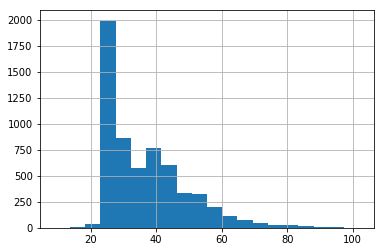

In [40]:
df_unknown_vars.var15.hist(bins=20)

A maior parte dos registros se concentram entre os valores 20 e 40, com cada vez menos clientes sendo classificados após este intervalo.

In [43]:
pd.concat([df_unknown_vars.var15, train_sample_y], axis=1).corr()

,var15,TARGET
var15,1.000000,0.272206
TARGET,0.272206,1.000000


In [49]:
var15_by_target = pd.concat([df_unknown_vars.var15, train_sample_y], axis=1)

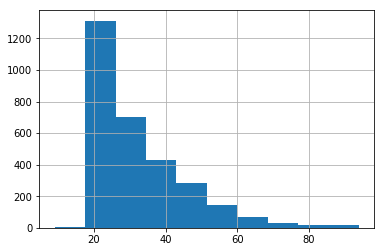

In [58]:
var15_by_target[var15_by_target.TARGET == 0].var15.hist()

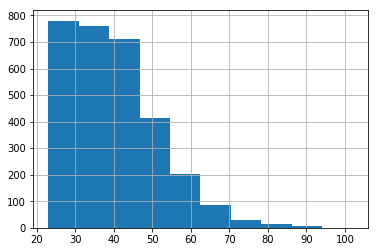

In [57]:
var15_by_target[var15_by_target.TARGET == 1].var15.hist()

Identificamos uma correlação positiva entre 'var15' e o grau de satisfação do cliente, sugerindo a possibilida de identificar clientes insatisfeitos com essa variável.

As variáveis selecionadas para compor a primeira versão do modelo preditivo foram:

* num_var5
* num_var30
* num_var42
* num_meses_var5_ult3
* var36
* var15

Os valores contidos nessas variáveis serão padronizados antes de submetidos ao modelo preditivo